# Practical work 08 - Clustering

## Imports

In [2]:
from sphinx.addnodes import centered
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

## Exercise 1 - Getting the data

a) Load the two given datasets:

In [3]:
data1, label1 = pickle.load(open("dataset_1.pkl", "rb"), encoding ="latin1")
data2, label2 = pickle.load(open("dataset_2.pkl", "rb"), encoding ="latin1")

b) Visualize the data using various color for each unique labels

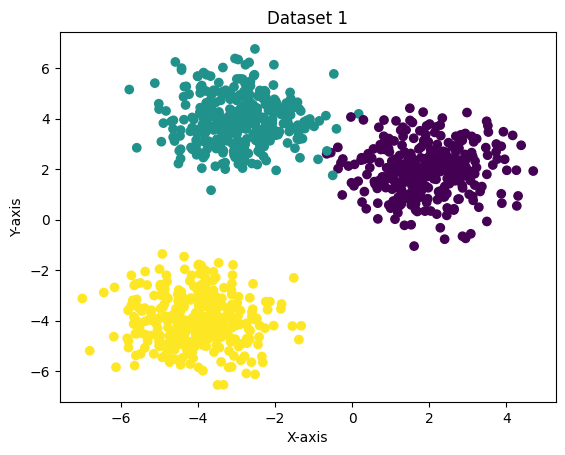

In [5]:
plt.scatter(data1[:,0], data1[:,1], c=label1)
plt.xlabel("X-axis")  # Label for the x-axis
plt.ylabel("Y-axis")  # Label for the y-axis
plt.title("Dataset 1")
plt.show()

## Exercise 2 - The $k$-means algorithm

a) Initialise the centroids $\mu_1, \mu_2, ... , \mu_K$

In [34]:
def initCentroids(data, k, seed=42):
    np.random.seed(seed)
    return data[np.random.choice(data.shape[0], k, replace=False), :]

b) Until convergence :

<span style="margin-left: 20px;">i) Find the closest centroid for each point</span>

In [35]:
def findClosestCentroid(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    closestCentroids = np.argmin(distances, axis=1)
    return closestCentroids

<span style="margin-left: 20px;">ii) Reevaluate the centroids</span>

In [36]:
def updateCentroids(data, closestCentroids, k):
    newCentroids = []
    for indexClust in range(k):
        dataSubset = data[closestCentroids == indexClust]
        if len(dataSubset) > 0:
            newCentroids.append(dataSubset.mean(axis=0))
    return np.array(newCentroids)

c) Return the $k$ centroids.

In [37]:
def kmeans(data, k, iter=1000,  convergenceThreshold=0.01):
    centroids = initCentroids(data, k) 
    prevCentroids = centroids.copy() 
    
    yPred = []
    costValues = []
    iteration = 0
    
    while iteration < iter:
        closestCentroids = findClosestCentroid(data, centroids)
        centroids = updateCentroids(data, closestCentroids, k)
        yPred = closestCentroids
        centroidDiff = np.linalg.norm(centroids - prevCentroids, axis=1).mean()
        costValues.append(centroidDiff)
        if centroidDiff < convergenceThreshold: 
            break
        prevCentroids = centroids.copy() 
        iteration += 1
    return yPred, centroids, costValues

We also ask you to define and implement strategies for the :

* Initialisation of the centroids.
* Convergence criteria.

## Exercise 3 - Evaluate your model

Run your algorithm with the dataset 1.

In [41]:
yPredValues, centre, cost = kmeans(data1, 3)
print(centre)
print(cost)

[[-2.94851563  3.96283241]
 [-4.0425738  -3.95057821]
 [ 1.89702162  1.97006469]]
[0.994325383603489, 0.01571849608428777, 0.0]


Visualize your convergence criteria over the epochs using the dataset 1.

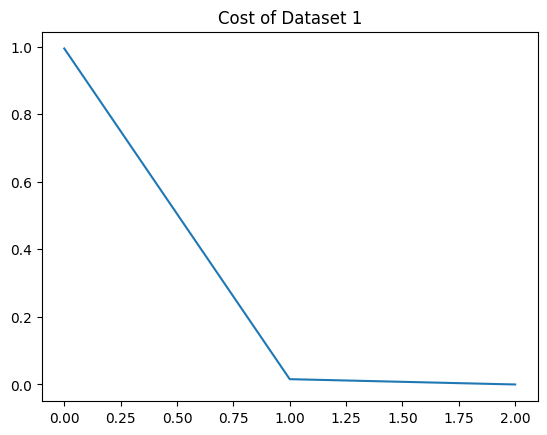

In [42]:
plt.plot(cost)
plt.title("Cost of Dataset 1")
plt.show()

Visualize the output of your $k$-means on the dataset 1.

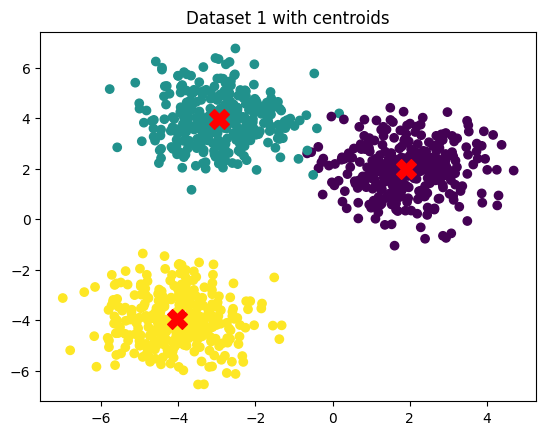

In [43]:
plt.scatter(data1[:,0], data1[:,1], c=label1)
plt.scatter(centre[:, 0], centre[:, 1], marker='X', s=200, c='red', label='Predicted Centroids')
plt.title("Dataset 1 with centroids")
plt.show()

Do you experience sensitivity to the initial values of the centroids? Is your strategy for initialization working well in most cases?

In this case we fixed a seed value of 42 for the initCentroids so the random sequence is the same for each run. It allows us to get the same random starting coordinates pour each k. So we dont experience the sensitivity of initial values but we afirm that this strategy works for us.

Document your convergence criteria. Could you think about other convergence criteria?

In our case we have two convergence criteria. The change threshold and the maximum iteration. For the first one, it decide when the change between two iteration is lower than the threshold. The second criteria prevent the algortihme form running indefinitely.
We think about the cluster distance as an other convergence criteria. It measure the distance between two criterion. when this value is high it significate that the clusters are well separated. We can setup a maximum value to stop the process.

Run your algorithm with the dataset 2.

In [52]:
yPredValues, centre, cost = kmeans(data2, 5)

Visualize your convergence criteria over time using the dataset 2.

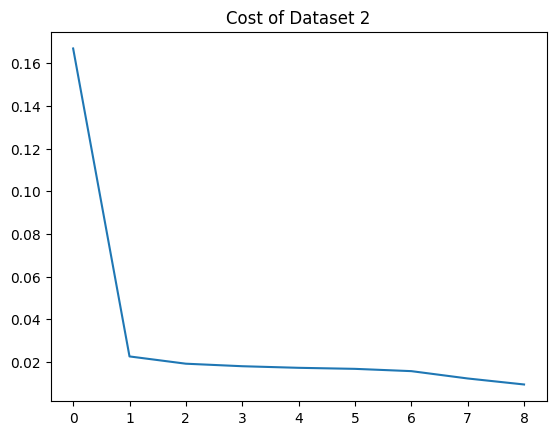

In [53]:
plt.plot(cost)
plt.title("Cost of Dataset 2")
plt.show()

Visualize the output of your $k$-means on the dataset 2 and comment your results.

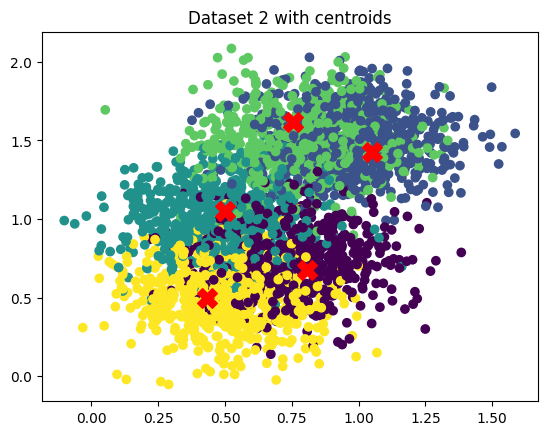

In [54]:
plt.scatter(data2[:,0], data2[:,1], c=label2)
plt.scatter(centre[:, 0], centre[:, 1], marker='X', s=200, c='red', label='Predicted Centroids')
plt.title("Dataset 2 with centroids")
plt.show()

_Your comment_

we can assume that our algorithm deliver a good result. The cross indicate the centers of each cluster. With this datasets we just set the K number as 5 because we have more clusters to detect.